Problem Statement : Solar power consumption has been recorded by city councils at regular intervals.The reason behind doing so is to understand how businesses are using solar power so that they can cut down on nonrenewable sources of energy and shift towards renewable energy. Based on the data, build a forecasting model and provide insights on it. 

Business Objective :

Maximize : The use of solar power so that the natural things may not get harm
    
Minimize : The use of non-rennewable source
    
Business contraints : Availability of solar systms and budget 

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv('solarpower.csv')

In [13]:
df.columns

Index(['date', 'cum_power'], dtype='object')

In [14]:
# Check for missing values
print(df.isnull().sum())
# There is no null value is present 

date         0
cum_power    0
dtype: int64


In [15]:
# Summary statistics
print(df.describe())

          cum_power
count   2558.000000
mean   13461.057349
std     8129.192104
min        0.100000
25%     6665.350000
50%    13000.500000
75%    20183.750000
max    28120.000000


In [16]:
# There is  slight more difference in mean and median . So may be the data is not stationary
# lets check

<Axes: >

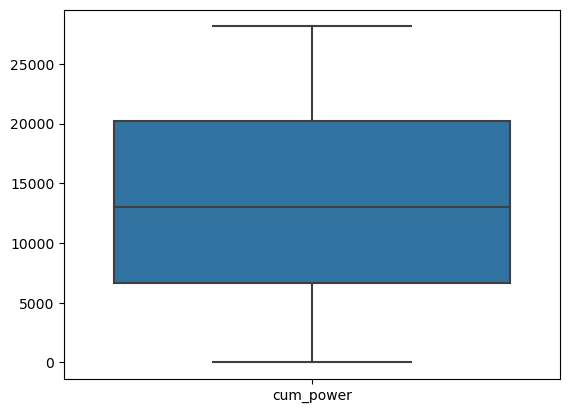

In [17]:
# Check for the outlierss
sns.boxplot(df)
# There is no outliers

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4928\3897339269.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.cum_power)


<Axes: xlabel='cum_power', ylabel='Density'>

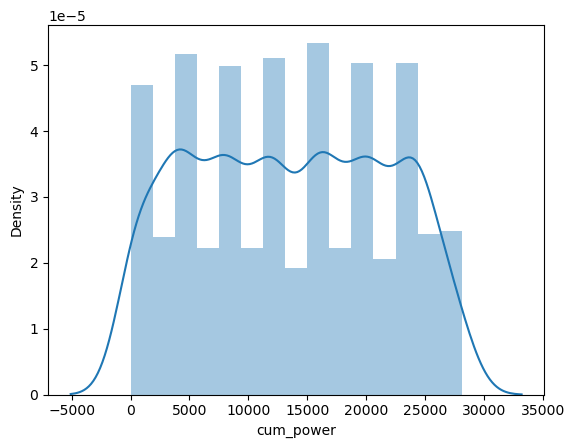

In [19]:
# Plot the distplot to checkwhether data is normally distributed or not
sns.distplot(df.cum_power)
# Data is smowhat bi-modal in nature

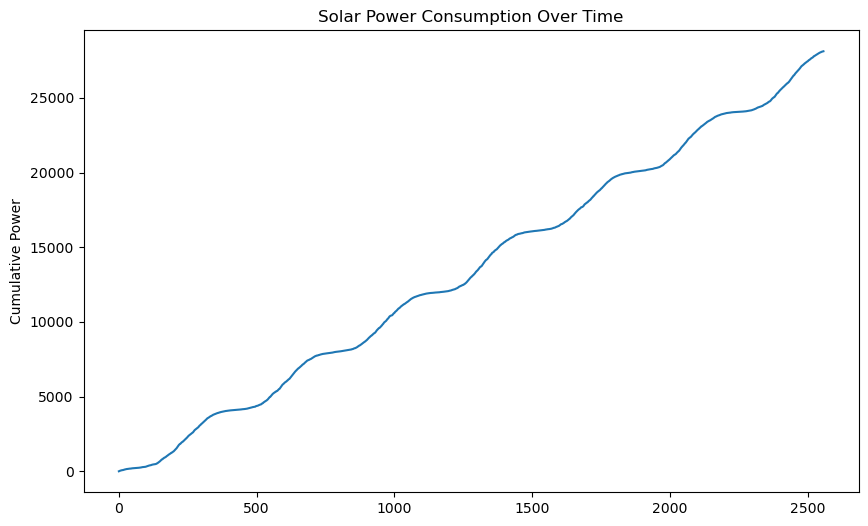

In [20]:
# Plotting time series
df['cum_power'].plot(figsize=(10, 6))
plt.ylabel('Cumulative Power')
plt.title('Solar Power Consumption Over Time')
plt.show()
# the data shows increases so the data is not stationary

In [24]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Set the 'date' column as the index
df.set_index('date', inplace=True)

# Now, let's try resampling again
df_monthly = df.resample('M').mean().fillna(method='ffill')


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4928\3422291342.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date'] = pd.to_datetime(df['date'])


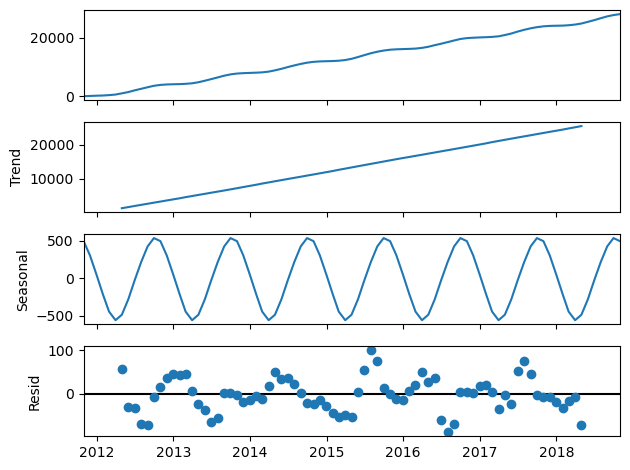

In [25]:
# Time Series Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df_monthly, model='additive')
decomposition.plot()
plt.show()

In [26]:
# By seasonal decomposition The data become more constant and stationary

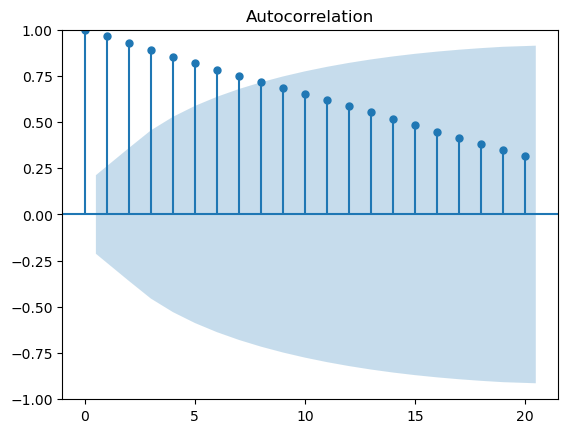

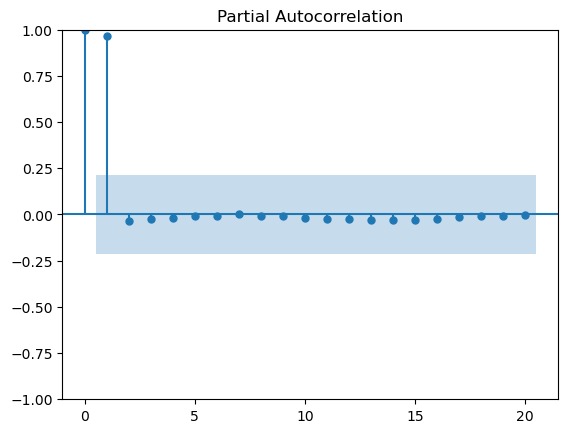

                               SARIMAX Results                                
Dep. Variable:              cum_power   No. Observations:                   85
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -499.595
Date:                Sat, 16 Mar 2024   AIC                           1005.190
Time:                        12:25:11   BIC                           1012.483
Sample:                    10-31-2011   HQIC                          1008.122
                         - 10-31-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9342      0.039     23.841      0.000       0.857       1.011
ma.L1          0.4801      0.105      4.585      0.000       0.275       0.685
sigma2      8296.0227   1480.598      5.603      0.0

In [27]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF and PACF plots
plot_acf(df_monthly)
plot_pacf(df_monthly)
plt.show()

# Define and fit the ARIMA model
# Note: You might need to adjust p, d, q values based on ACF and PACF plots
model = ARIMA(df_monthly, order=(1,1,1)) # These are example parameters
results = model.fit()

# Summary of the model
print(results.summary())


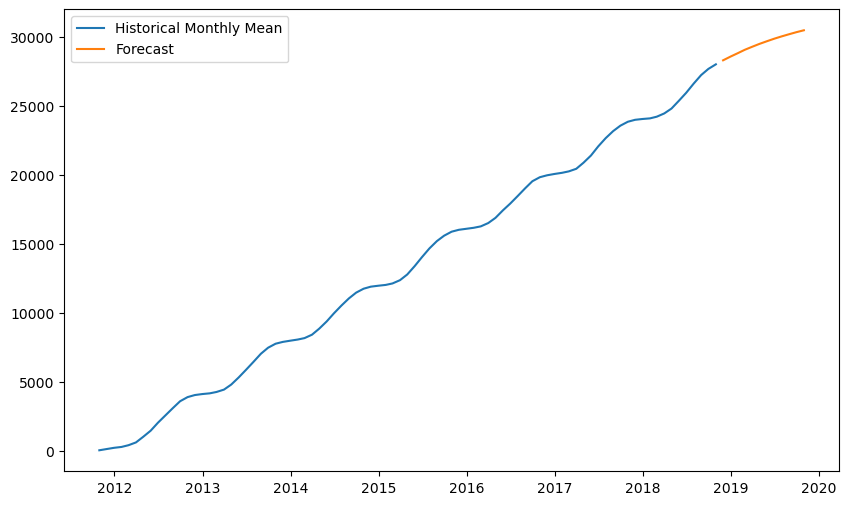

In [28]:
# Forecasting Future Solar Power Consumption
# Forecasting the next 12 months as an example
forecast = results.forecast(steps=12)

# Plotting the forecast
plt.figure(figsize=(10, 6))
plt.plot(df_monthly.index, df_monthly['cum_power'], label='Historical Monthly Mean')
plt.plot(forecast.index, forecast, label='Forecast')
plt.legend()
plt.show()

In [29]:
# as we see the solor power consumptions are increasing on consistently in future

In [31]:
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm

# Auto ARIMA to find best parameters
model = pm.auto_arima(df['cum_power'], seasonal=True, m=12, trace=True)

# Fit ARIMA model
model_fit = ARIMA(df['cum_power'], order=model.order).fit()

# Summary of the model
print(model_fit.summary())


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=8.17 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=18025.637, Time=0.09 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=15912.070, Time=1.55 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=16534.003, Time=1.53 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=20652.126, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=15947.568, Time=0.37 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=15891.605, Time=4.66 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=15846.209, Time=9.23 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=15846.544, Time=2.69 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=14.04 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=15845.501, Time=7.93 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=15908.983, Time=3.36 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=15918.204, Time=1.13 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=16431.964, Time=8.38 sec
 ARIMA(2,1,0)(1,

C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


2018-10-27    28122.726878
2018-10-28    28125.205499
2018-10-29    28127.458466
2018-10-30    28129.506320
2018-10-31    28131.367737
2018-11-01    28133.059689
2018-11-02    28134.597604
2018-11-03    28135.995507
2018-11-04    28137.266144
2018-11-05    28138.421101
2018-11-06    28139.470911
2018-11-07    28140.425145
Freq: D, Name: predicted_mean, dtype: float64


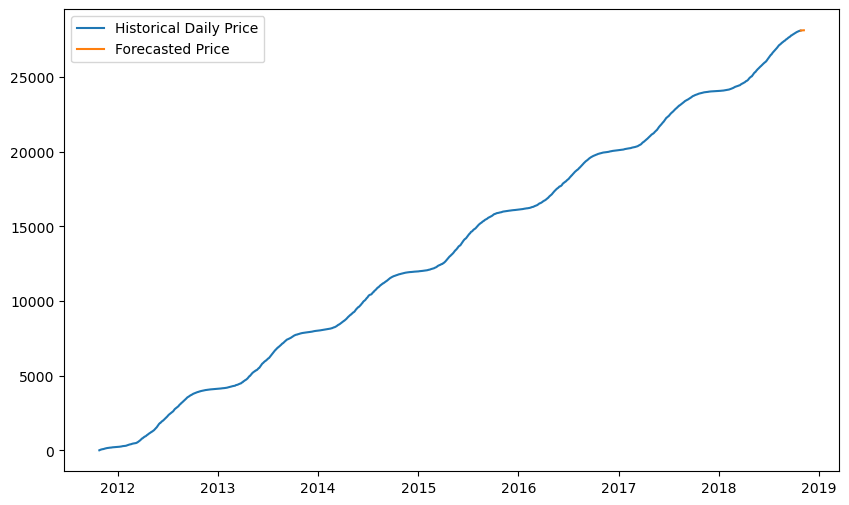

In [32]:
# Forecast
forecast = model_fit.forecast(steps=12)  # For example, next 12 periods
print(forecast)

# Plotting the forecast
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['cum_power'], label='Historical Daily Price')
plt.plot(forecast.index, forecast, label='Forecasted Price')
plt.legend()
plt.show()

